# **Stock Market Analysis::**

In [1]:
pip install scikit-learn

In [2]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web

#% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import mplfinance as mpf

import matplotlib.dates as mdates

import datetime as dt
style.use('ggplot')


# **Data Exploration**

In [4]:
stock_data =pd.read_csv('/content/drive/MyDrive/nifty50.csv')

# **Data Analysis**

In [5]:
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [6]:
stock_data.set_index('Date', inplace = True)

In [7]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-24,11069.349609,11110.099609,11046.150391,11086.000000,11086.000000,283400.0
2018-01-25,11095.599609,11095.599609,11009.200195,11069.650391,11069.650391,330300.0
2018-01-29,11079.349609,11171.549805,11075.950195,11130.400391,11130.400391,241700.0
2018-01-30,11120.849609,11121.099609,11033.900391,11049.650391,11049.650391,228000.0
2018-01-31,11018.799805,11058.500000,10979.299805,11027.700195,11027.700195,245900.0


In [8]:
stock_data.shape

(2563, 6)

In [9]:
stock_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [10]:
#some basic information about dataset
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2563 entries, 2007-09-17 to 2018-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2538 non-null   float64
 1   High       2538 non-null   float64
 2   Low        2538 non-null   float64
 3   Close      2538 non-null   float64
 4   Adj Close  2538 non-null   float64
 5   Volume     2538 non-null   float64
dtypes: float64(6)
memory usage: 140.2+ KB


In [11]:
# cleaning Data
stock_data.fillna(method ='ffill', inplace = True)
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-24,11069.349609,11110.099609,11046.150391,11086.000000,11086.000000,283400.0
2018-01-25,11095.599609,11095.599609,11009.200195,11069.650391,11069.650391,330300.0
2018-01-29,11079.349609,11171.549805,11075.950195,11130.400391,11130.400391,241700.0
2018-01-30,11120.849609,11121.099609,11033.900391,11049.650391,11049.650391,228000.0
2018-01-31,11018.799805,11058.500000,10979.299805,11027.700195,11027.700195,245900.0


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2563 entries, 2007-09-17 to 2018-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2563 non-null   float64
 1   High       2563 non-null   float64
 2   Low        2563 non-null   float64
 3   Close      2563 non-null   float64
 4   Adj Close  2563 non-null   float64
 5   Volume     2563 non-null   float64
dtypes: float64(6)
memory usage: 140.2+ KB


In [13]:
display(stock_data.describe())

,Open,High,Low,Close,Adj Close,Volume
count,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000
mean,6403.617126,6445.988670,6353.244496,6400.489623,6400.489623,85842.606321
std,1855.432620,1848.064011,1858.680769,1852.835402,1852.835402,96808.267875
min,2526.199951,2585.300049,2252.750000,2524.199951,2524.199951,0.000000
25%,5129.350098,5166.574951,5082.000000,5128.550049,5128.550049,0.000000
50%,5884.799805,5917.799805,5836.899902,5882.250000,5882.250000,0.000000
75%,8045.699952,8100.625000,7996.375000,8045.724853,8045.724853,163700.000000
max,11120.849609,11171.549805,11075.950195,11130.400391,11130.400391,594200.000000


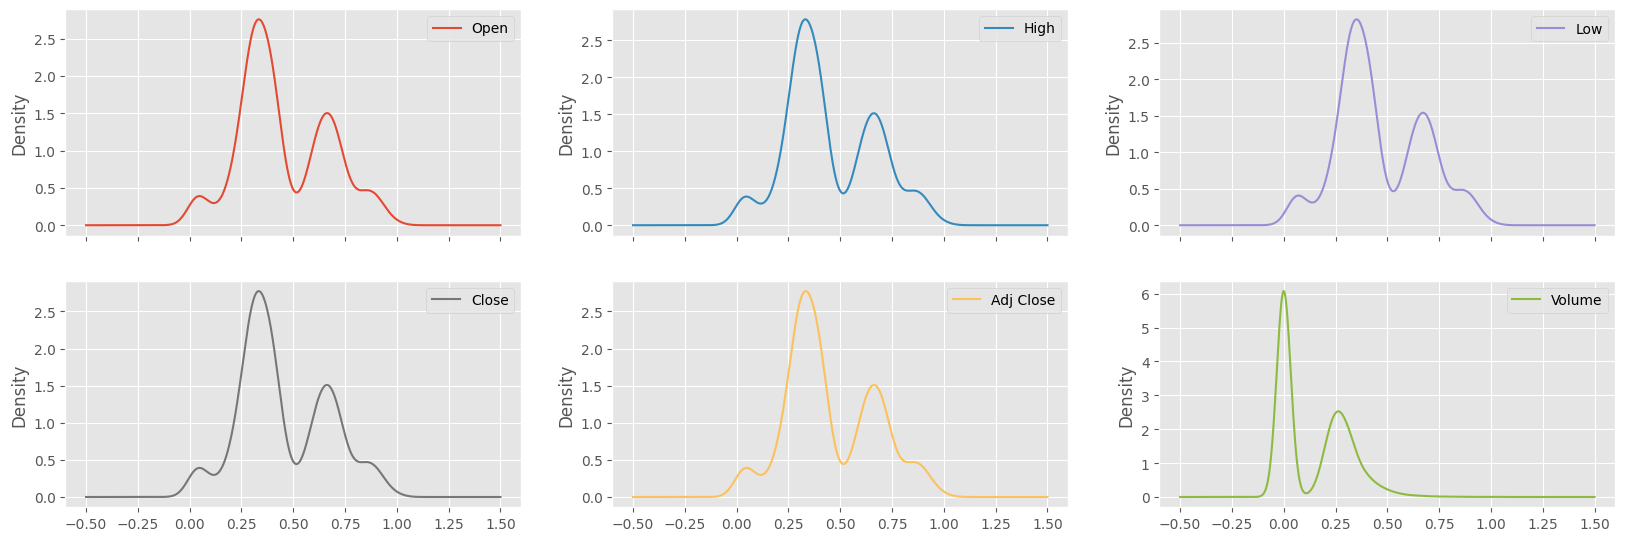

In [14]:
stock_norm_data= pd.DataFrame()

stock_norm_data['Open'] = (stock_data['Open'] - min(stock_data['Open'])) / (max(stock_data['Open']) - min(stock_data['Open']))
stock_norm_data['High'] = (stock_data['High'] - min(stock_data['High'])) / (max(stock_data['High']) - min(stock_data['High']))
stock_norm_data['Low'] = (stock_data['Low'] - min(stock_data['Low'])) / (max(stock_data['Low']) - min(stock_data['Low']))
stock_norm_data['Close'] = (stock_data['Close'] - min(stock_data['Close'])) / (max(stock_data['Close']) - min(stock_data['Close']))
stock_norm_data['Adj Close'] = (stock_data['Adj Close'] - min(stock_data['Adj Close'])) / (max(stock_data['Adj Close']) - min(stock_data['Adj Close']))
stock_norm_data['Volume'] = (stock_data['Volume'] - min(stock_data['Volume'])) / (max(stock_data['Volume']) - min(stock_data['Volume']))

stock_norm_data.plot(kind = 'density', subplots = True, sharex = True, layout = (3, 3), figsize = (20, 10))
plt.show()

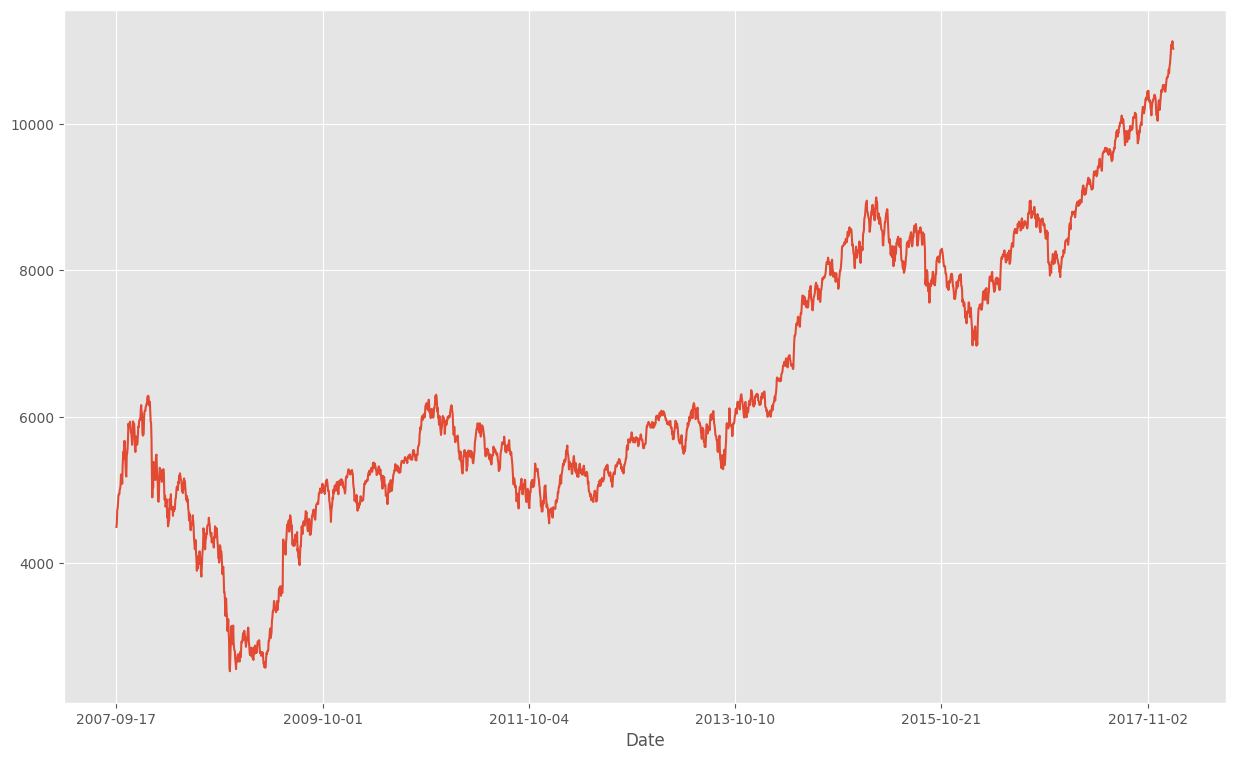

In [15]:
# Visualizing Adj Close price
fig = plt.figure(figsize = (15, 9))
stock_data['Adj Close'].plot()
plt.show()

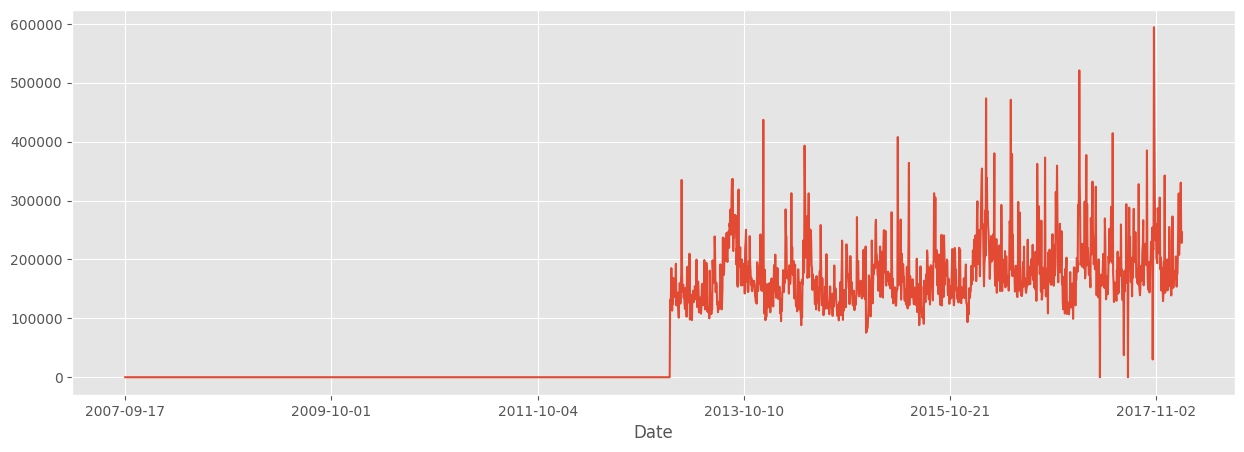

In [16]:
# Plotting total volumes traded over time
fig = plt.figure(figsize = (15, 5))
stock_data['Volume'].plot()
plt.show()

In [17]:
from mplfinance.original_flavor import candlestick_ohlc

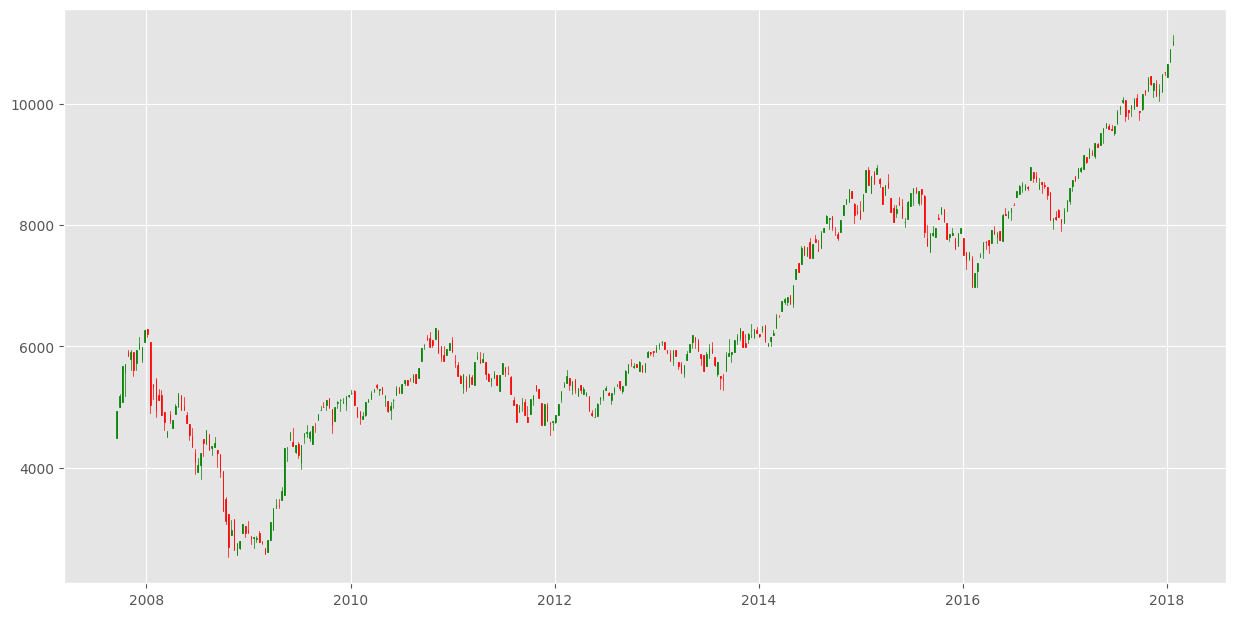

In [18]:
#japenese Candlestick Plot...
def plot_candlestick_ohlc():
  df = pd.read_csv('/content/drive/MyDrive/nifty50.csv', parse_dates = True, index_col= 0)
  df_ohlc = df['Adj Close'].resample('10D').ohlc()
  df_volume = df['Volume'].resample('10D').sum()
  df_ohlc.reset_index(inplace = True)
  df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
  fig = plt.figure(figsize = (15, 9))
  ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
  ax1. xaxis_date()
  candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
  plt.show()
  return
plot_candlestick_ohlc()

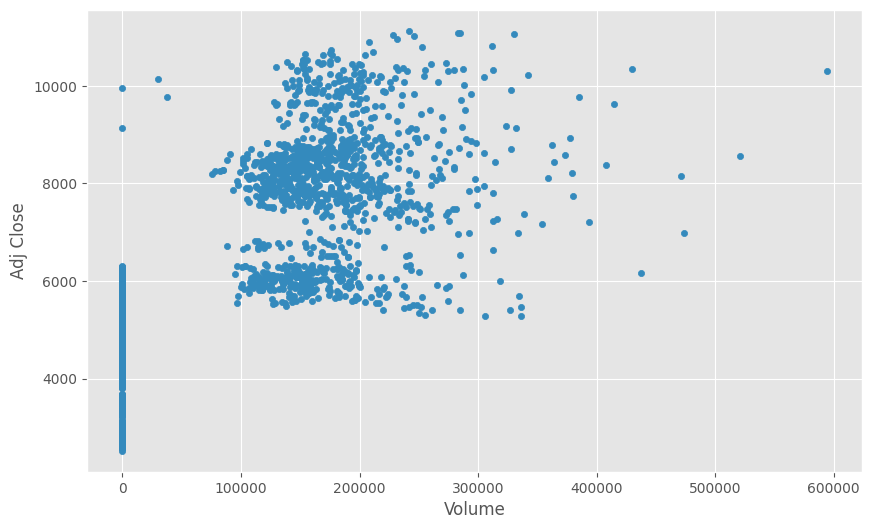

In [19]:
# Scatter Plots
stock_data.fillna(method = 'ffill', inplace = True)
stock_data.plot.scatter(x= 'Volume', y = 'Adj Close', figsize = (10, 6))
plt.show()

array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Adj Close', ylabel='Open'>,
        <Axes: xlabel='Volume', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Adj Close', ylabel='High'>,
        <Axes: xlabel='Volume', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Adj Close', ylabel='Low'>,
        <Axes: xlabel='Volume', ylabel='Low'>],
       [<Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes:

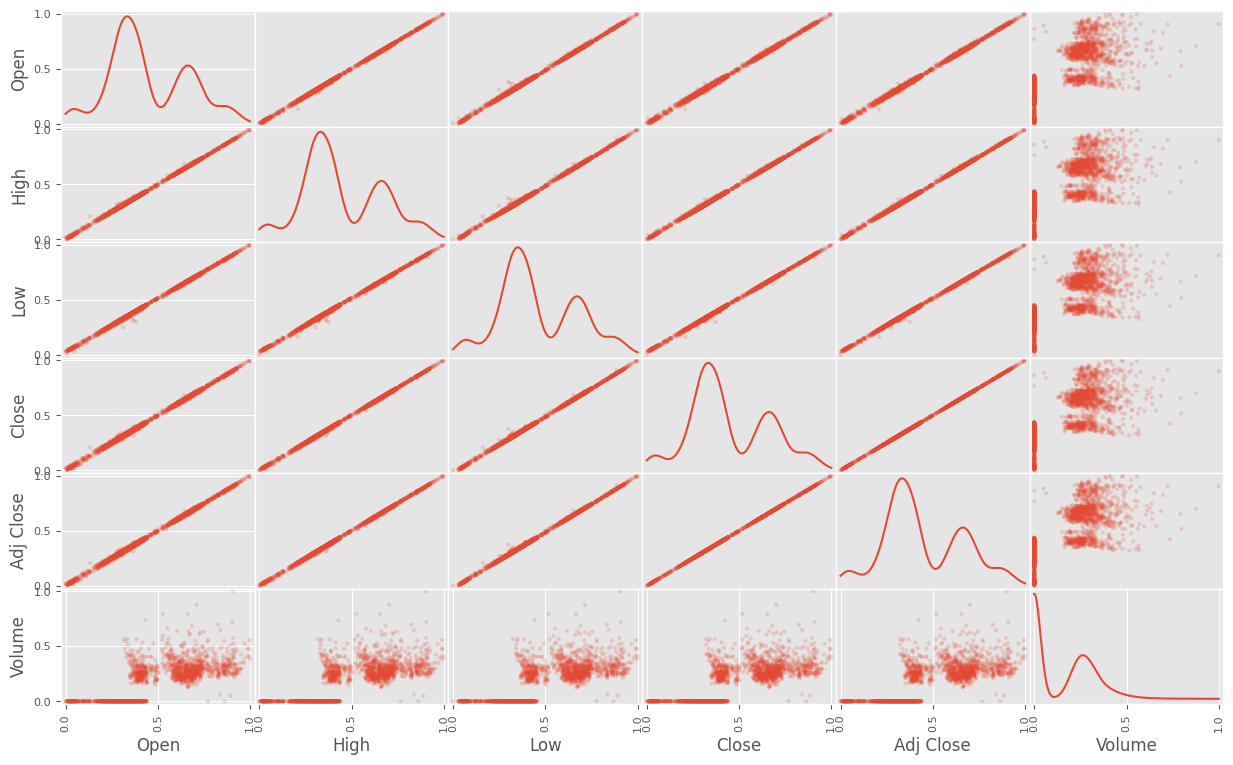

In [20]:
# Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(stock_norm_data, alpha = 0.2, figsize = (15, 9), diagonal= 'kde')

In [21]:
# Percentage change, from one day to next...
pct_data = stock_data.pct_change()
pct_data = pct_data.replace([np.inf, -np.inf], 0)
pct_data.fillna(0,inplace = True)

pct_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2007-09-18,-0.005389,0.000605,-0.000290,0.011469,0.011469,0.0
2007-09-19,0.012494,0.041127,0.015330,0.040946,0.040946,0.0
2007-09-20,0.040569,0.004611,0.037558,0.003212,0.003212,0.0
2007-09-21,0.003823,0.019923,0.002658,0.018957,0.018957,0.0


In [22]:
# Moving Average
ma_days =[10, 20, 30]

for ma in ma_days:
  column_name = "MA for %s days" %(str(ma))

  stock_data[column_name] = stock_data['Adj Close']. rolling(window=ma, center= False).mean()

stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 30 days
Date,,,,,,,,,
2018-01-24,11069.349609,11110.099609,11046.150391,11086.000000,11086.000000,283400.0,10841.060059,10689.587549,10594.058366
2018-01-25,11095.599609,11095.599609,11009.200195,11069.650391,11069.650391,330300.0,10882.905078,10719.175049,10623.281706
2018-01-29,11079.349609,11171.549805,11075.950195,11130.400391,11130.400391,241700.0,10927.820117,10749.160058,10652.558398
2018-01-30,11120.849609,11121.099609,11033.900391,11049.650391,11049.650391,228000.0,10958.630176,10775.107568,10676.438411
2018-01-31,11018.799805,11058.500000,10979.299805,11027.700195,11027.700195,245900.0,10991.355176,10804.382568,10697.736751


<Axes: xlabel='Date'>

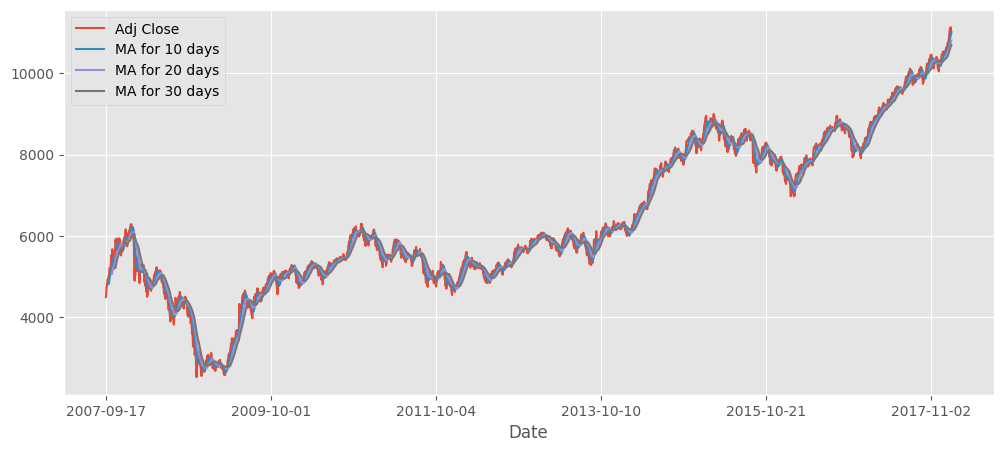

In [23]:
#  Plotting moving averages
stock_data[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots= False, figsize= (12, 5))

In [42]:
# Feayure relevance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in list(pct_data.columns.values):
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = pct_data.drop(col, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(new_data, pct_data[col], test_size= 0.2, random_state = 42)
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("{} r^2 score:{:2f}".format(col, score))

Open r^2 score:0.511342
High r^2 score:0.641164
Low r^2 score:0.245819
Close r^2 score:0.999762
Adj Close r^2 score:0.999762
Volume r^2 score:-1.389979


In [31]:
print("SAMARPAN KUMAR")

SAMARPAN KUMAR


In [32]:
print("CEO: KHURRANA BUILDERS")

CEO: KHURRANA BUILDERS
